In [1]:
import pandas as pd

df1 = pd.read_csv("air_quality_data_1.csv")
df2 = pd.read_csv("air_quality_data_2.csv")

df = pd.concat([df1, df2])
df.reset_index(drop=True, inplace=True)
df = df.sort_values(by=['zipCode', 'DateObserved'])
df['zipcode'] = df['zipCode'].astype(str).str.zfill(5)
df.to_csv("merged_air_quality_data.csv", index=False)

pivot_df = df.pivot(index=['DateObserved', 'zipCode'], columns='ParameterName', values=['AQI', 'CategoryName'])
pivot_df.columns = [f'{name}_{param}' for name, param in pivot_df.columns]
pivot_df.reset_index(inplace=True)

pivot_df = pd.merge(pivot_df, df[['DateObserved', 'zipCode', 'Longitude', 'Latitude']].drop_duplicates(), on=['DateObserved', 'zipCode'], how='left')

pivot_df.rename(columns={'DateObserved': 'Date', 'zipCode': 'ZipCode'}, inplace=True)
pivot_df.to_csv("filtered_air_quality_data.csv", index=False)




In [2]:
import pandas as pd

df = pd.read_csv('filtered_air_quality_data.csv')

zipcode_means = df.groupby('ZipCode').agg({'AQI_OZONE': 'mean', 'AQI_PM10': 'mean', 'AQI_PM2.5': 'mean'})

def max_category(series):
    if not series.empty:
        return series.value_counts().idxmax()
    else:
        return None

aqi_columns = ['AQI_OZONE', 'AQI_PM10', 'AQI_PM2.5']
for aqi_column in aqi_columns:
    df[aqi_column] = df[aqi_column].apply(lambda x: x if not pd.isna(x) else None)

for category_column in ['CategoryName_OZONE', 'CategoryName_PM10', 'CategoryName_PM2.5']:
    non_empty_data = df.dropna(subset=[category_column])
    zipcode_means[category_column] = non_empty_data.groupby('ZipCode')[category_column].apply(max_category)

zipcode_means[['Latitude', 'Longitude']] = df.groupby('ZipCode')[['Latitude', 'Longitude']].first()

zipcode_means.to_csv('air_quality_summary.csv')
print(zipcode_means)


         AQI_OZONE   AQI_PM10  AQI_PM2.5 CategoryName_OZONE CategoryName_PM10  \
ZipCode                                                                         
2108     34.403509  15.106383  34.196667               Good              Good   
2109     34.403509  15.106383  34.196667               Good              Good   
2110     34.403509  15.106383  34.196667               Good              Good   
2111     34.403509  15.106383  34.196667               Good              Good   
2113     34.403509  15.106383  34.196667               Good              Good   
2114     34.403509  15.106383  34.196667               Good              Good   
2115     34.403509  15.106383  34.196667               Good              Good   
2116     34.403509  15.106383  34.196667               Good              Good   
2118     34.403509  15.106383  34.196667               Good              Good   
2119     34.403509  15.106383  34.196667               Good              Good   
2120     34.403509  15.10638

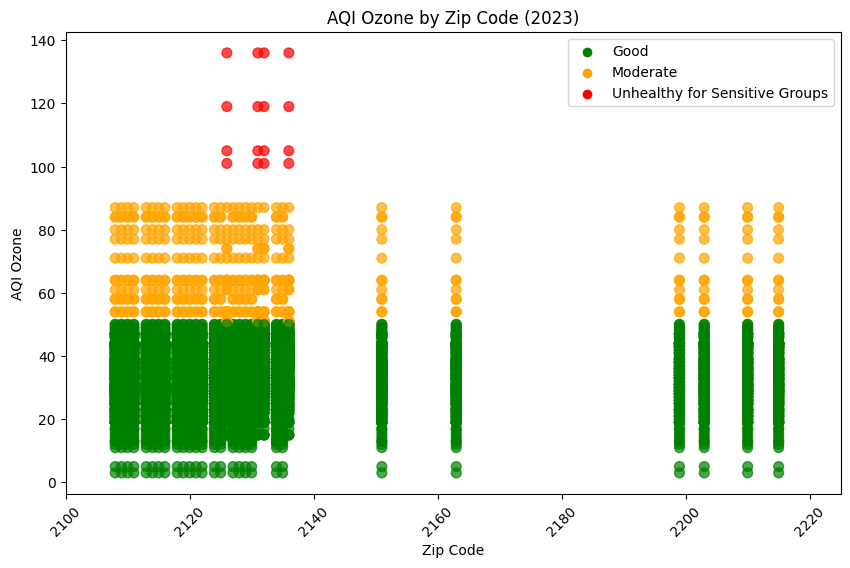

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('filtered_air_quality_data.csv')

def map_category_to_color(category):
    if category == 'Good':
        return 'green'
    elif category == 'Moderate':
        return 'orange'
    elif category == 'Unhealthy for Sensitive Groups':
        return 'red'
    else:
        return 'blue'  
    
data['CategoryColor'] = data['CategoryName_OZONE'].apply(map_category_to_color)

zip_code_range = (2100, 2225) 
filtered_data = data[(data['ZipCode'] >= zip_code_range[0]) & (data['ZipCode'] <= zip_code_range[1])]

plt.figure(figsize=(10, 6))


plt.scatter(filtered_data['ZipCode'], filtered_data['AQI_OZONE'], c=filtered_data['CategoryColor'], s=50, alpha=0.7)
plt.title('AQI Ozone by Zip Code (2023)')
plt.xlabel('Zip Code')
plt.ylabel('AQI Ozone')
plt.xticks(rotation=45)

legend_labels = {
    'Good': 'green',
    'Moderate': 'orange',
    'Unhealthy for Sensitive Groups': 'red',
}
for category, color in legend_labels.items():
    plt.scatter([], [], label=category, color=color)

plt.legend()

plt.xlim(zip_code_range)


plt.show()


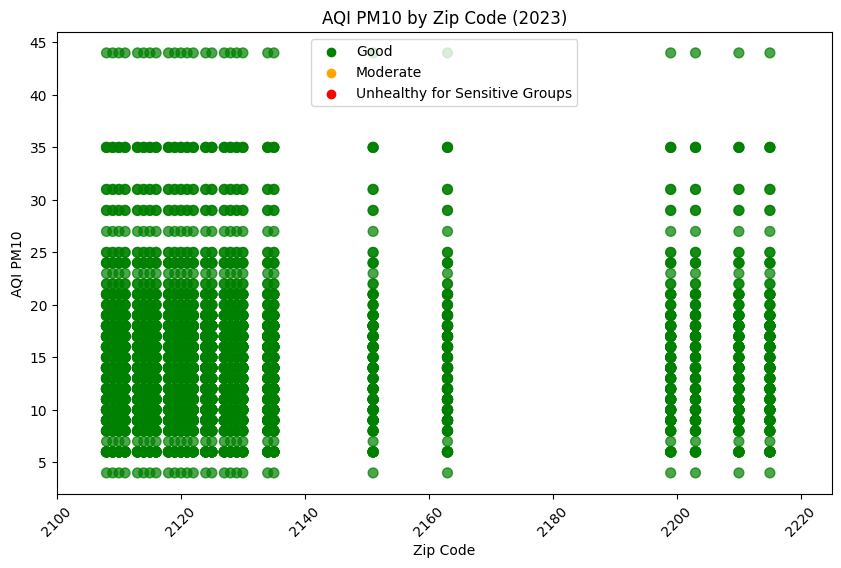

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('filtered_air_quality_data.csv')

def map_category_to_color(category):
    if category == 'Good':
        return 'green'
    elif category == 'Moderate':
        return 'orange'
    elif category == 'Unhealthy for Sensitive Groups':
        return 'red'
    else:
        return 'blue'  

data['CategoryColor'] = data['CategoryName_PM10'].apply(map_category_to_color)

zip_code_range = (2100, 2225) 
filtered_data = data[(data['ZipCode'] >= zip_code_range[0]) & (data['ZipCode'] <= zip_code_range[1])]
plt.figure(figsize=(10, 6))

plt.scatter(filtered_data['ZipCode'], filtered_data['AQI_PM10'], c=filtered_data['CategoryColor'], s=50, alpha=0.7)
plt.title('AQI PM10 by Zip Code (2023)')
plt.xlabel('Zip Code')
plt.ylabel('AQI PM10')
plt.xticks(rotation=45)

legend_labels = {
    'Good': 'green',
    'Moderate': 'orange',
    'Unhealthy for Sensitive Groups': 'red',
}
for category, color in legend_labels.items():
    plt.scatter([], [], label=category, color=color)

plt.legend()

plt.xlim(zip_code_range)


plt.show()


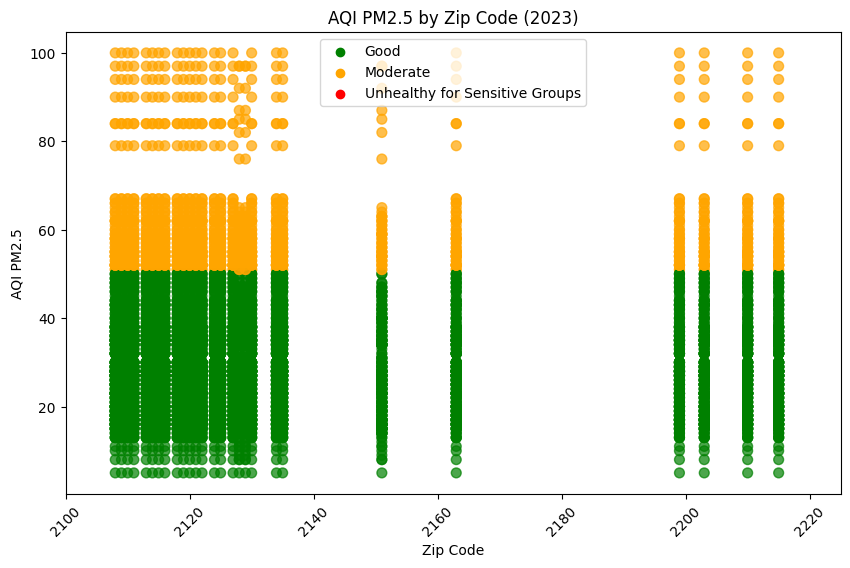

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('filtered_air_quality_data.csv')

def map_category_to_color(category):
    if category == 'Good':
        return 'green'
    elif category == 'Moderate':
        return 'orange'
    elif category == 'Unhealthy for Sensitive Groups':
        return 'red'
    else:
        return 'blue'  # You can add more colors for other categories

# Map the CategoryName to colors
data['CategoryColor'] = data['CategoryName_PM2.5'].apply(map_category_to_color)

# Define the range of zip codes you want to display
zip_code_range = (2100, 2225)  # Adjust this range as needed

# Filter the data to include only the selected zip code range
filtered_data = data[(data['ZipCode'] >= zip_code_range[0]) & (data['ZipCode'] <= zip_code_range[1])]

# Create the scatter plot
plt.figure(figsize=(10, 6))


plt.scatter(filtered_data['ZipCode'], filtered_data['AQI_PM2.5'], c=filtered_data['CategoryColor'], s=50, alpha=0.7)
plt.title('AQI PM2.5 by Zip Code (2023)')
plt.xlabel('Zip Code')
plt.ylabel('AQI PM2.5')
plt.xticks(rotation=45)

# Create a legend for the categories
legend_labels = {
    'Good': 'green',
    'Moderate': 'orange',
    'Unhealthy for Sensitive Groups': 'red',
}
for category, color in legend_labels.items():
    plt.scatter([], [], label=category, color=color)

plt.legend()

# Set the x-axis limits to your desired zip code range
plt.xlim(zip_code_range)


plt.show()
